In [9]:
#Import all the libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#connect with mysql and enter username and password and db name
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="root",
  database="mysql"
)

print(mydb)

In [11]:
show_tables=pd.read_sql_query('SHOW TABLES FROM mysql',mydb)

In [12]:
show_tables

,Tables_in_mysql
0,columns_priv
1,component
2,db
3,default_roles
4,engine_cost
5,func
6,general_log
7,global_grants
8,gtid_executed
9,help_category


In [13]:
#load the table data in df
df=pd.read_sql_query("SELECT * FROM studmarks",mydb)

In [14]:
#lets see whats inside the df 
df

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,5041988,55,45,56,87,21,52,89,65
1,Suresh,M,4051987,75,96,78,64,90,61,58,2
2,Ramesh,M,25051989,25,54,89,76,95,87,56,74
3,Jessica,F,12081990,78,96,86,63,54,89,75,45
4,Jessica,F,12081990,78,96,86,63,54,89,75,45
5,Annu,F,5041988,45,87,52,89,55,89,87,52
6,pooja,F,4051987,55,64,61,58,75,58,64,61
7,Ritesh,M,25051989,54,76,87,56,25,56,76,87
8,Farha,F,12081990,55,63,89,75,78,75,63,89
9,Mukesh,M,2091989,96,46,77,83,58,83,46,77


In [15]:
#check the correlation
df.corr()

,dob,maths,physics,chemistry,english,biology,economics,history,civics
dob,1.000000,-0.523185,0.024419,0.654031,-0.348017,-0.013002,0.106819,0.010901,0.426984
maths,-0.523185,1.000000,0.234373,0.142065,-0.160751,-0.167206,0.100284,-0.267981,-0.319328
physics,0.024419,0.234373,1.000000,0.184812,-0.489872,0.088715,0.279960,0.275138,-0.673234
chemistry,0.654031,0.142065,0.184812,1.000000,-0.486464,0.285689,0.292596,-0.474984,0.160289
english,-0.348017,-0.160751,-0.489872,-0.486464,1.000000,-0.102077,0.250044,0.145274,0.196903
biology,-0.013002,-0.167206,0.088715,0.285689,-0.102077,1.000000,0.306665,-0.683410,-0.290456
economics,0.106819,0.100284,0.279960,0.292596,0.250044,0.306665,1.000000,-0.142558,-0.017928
history,0.010901,-0.267981,0.275138,-0.474984,0.145274,-0.683410,-0.142558,1.000000,-0.046572
civics,0.426984,-0.319328,-0.673234,0.160289,0.196903,-0.290456,-0.017928,-0.046572,1.000000


In [16]:
df

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,5041988,55,45,56,87,21,52,89,65
1,Suresh,M,4051987,75,96,78,64,90,61,58,2
2,Ramesh,M,25051989,25,54,89,76,95,87,56,74
3,Jessica,F,12081990,78,96,86,63,54,89,75,45
4,Jessica,F,12081990,78,96,86,63,54,89,75,45
5,Annu,F,5041988,45,87,52,89,55,89,87,52
6,pooja,F,4051987,55,64,61,58,75,58,64,61
7,Ritesh,M,25051989,54,76,87,56,25,56,76,87
8,Farha,F,12081990,55,63,89,75,78,75,63,89
9,Mukesh,M,2091989,96,46,77,83,58,83,46,77


In [17]:
df.head(5)

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,5041988,55,45,56,87,21,52,89,65
1,Suresh,M,4051987,75,96,78,64,90,61,58,2
2,Ramesh,M,25051989,25,54,89,76,95,87,56,74
3,Jessica,F,12081990,78,96,86,63,54,89,75,45
4,Jessica,F,12081990,78,96,86,63,54,89,75,45


In [18]:
df.describe()

,dob,maths,physics,chemistry,english,biology,economics,history,civics
count,1.000000e+01,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,1.066299e+07,61.600000,72.300000,76.100000,71.40000,60.500000,73.900000,68.900000,59.700000
std,8.460308e+06,20.287927,20.661559,14.394829,12.17648,24.762202,15.487988,13.843972,25.729577
min,2.091989e+06,25.000000,45.000000,52.000000,56.00000,21.000000,52.000000,46.000000,2.000000
25%,4.299487e+06,54.250000,56.250000,65.000000,63.00000,54.000000,58.750000,59.250000,46.750000
50%,8.561989e+06,55.000000,70.000000,82.000000,69.50000,56.500000,79.000000,69.500000,63.000000
75%,1.208199e+07,77.250000,93.750000,86.750000,81.25000,77.250000,88.500000,75.750000,76.250000
max,2.505199e+07,96.000000,96.000000,89.000000,89.00000,95.000000,89.000000,89.000000,89.000000


In [19]:
df.shape


(10, 11)

In [20]:
df.isnull().sum()

name         0
gender       0
dob          0
maths        0
physics      0
chemistry    0
english      0
biology      0
economics    0
history      0
civics       0
dtype: int64

In [21]:
df['gender'].value_counts()

M    5
F    5
Name: gender, dtype: int64

In [ ]:
#check the gender data

Text(0.5, 1, 'Gender Plot')

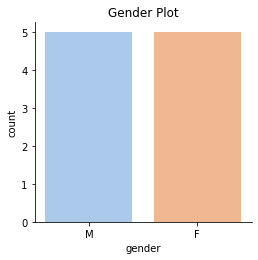

In [22]:
sns.catplot(x='gender',kind='count',data=df,height=3.5,palette='pastel')
plt.title('Gender Plot')

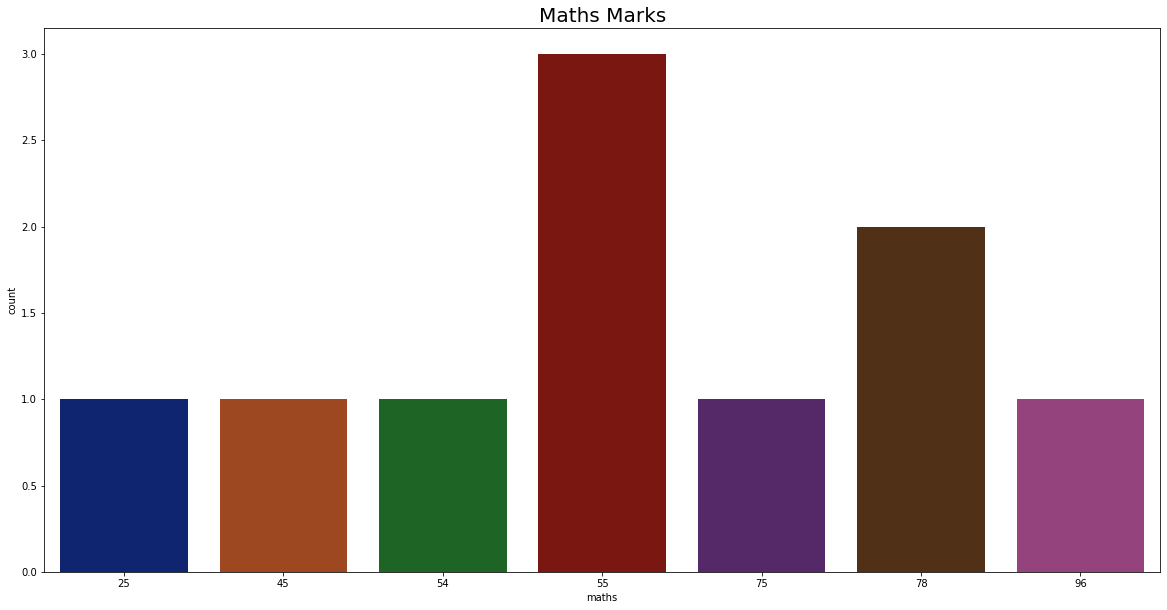

In [23]:
#We can see 55 marks is more scored
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['maths'], palette = 'dark')
plt.title('Maths Marks',fontsize = 20)
plt.show()

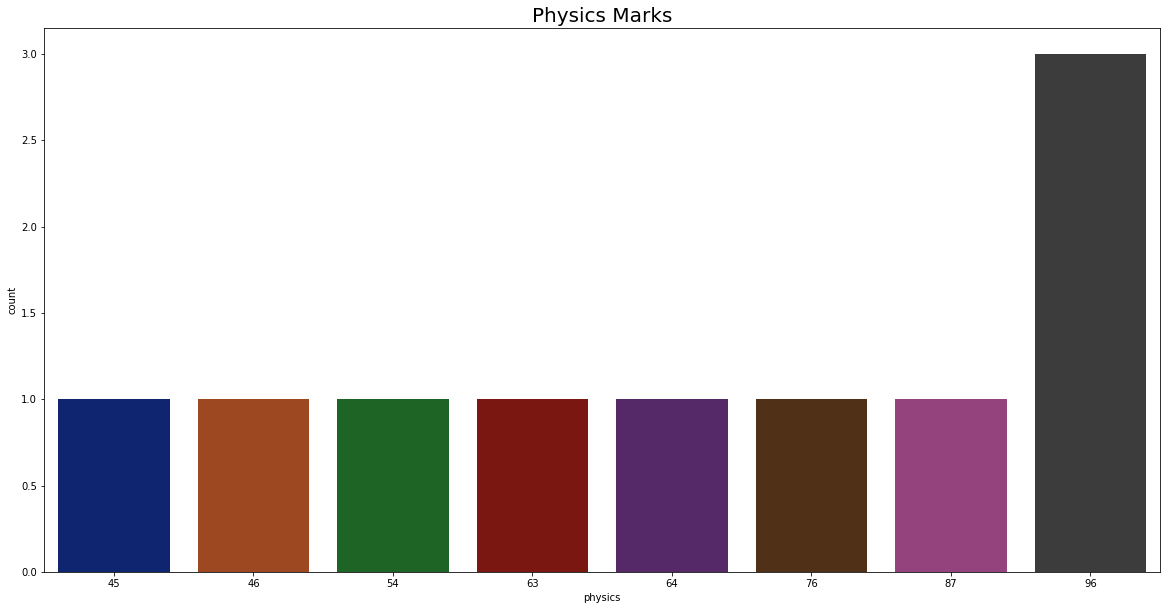

In [24]:
#We can see 96 marks is more scored
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['physics'], palette = 'dark')
plt.title('Physics Marks',fontsize = 20)
plt.show()

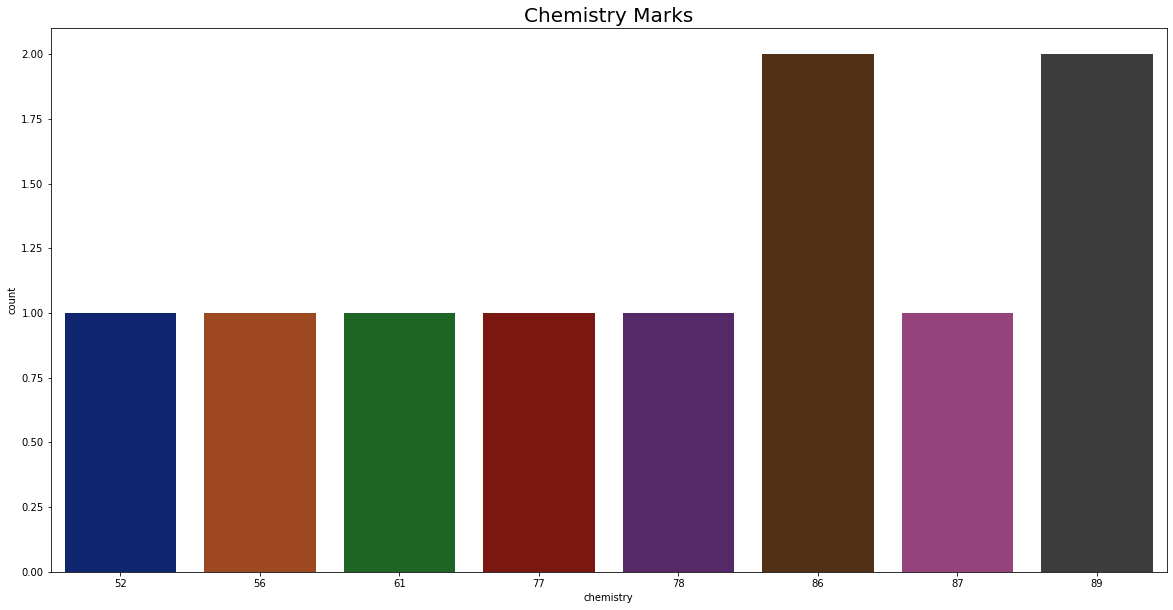

In [25]:
#We can see 86 and 89 marks is more scored
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['chemistry'], palette = 'dark')
plt.title('Chemistry Marks',fontsize = 20)
plt.show()

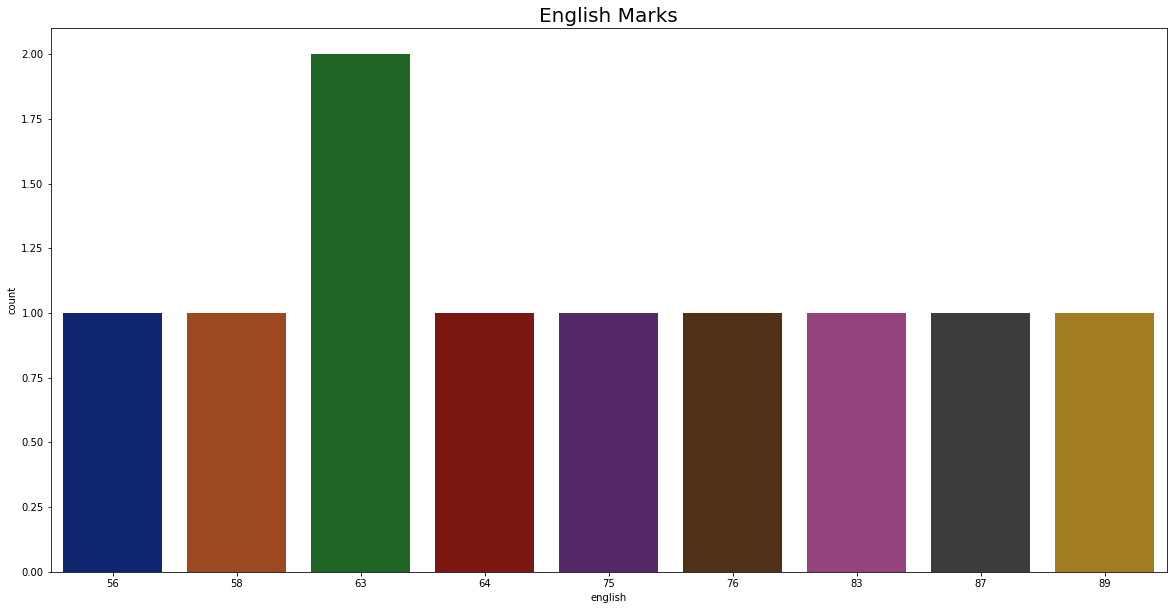

In [26]:
#We can see 63 marks is more scored
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['english'], palette = 'dark')
plt.title('English Marks',fontsize = 20)
plt.show()

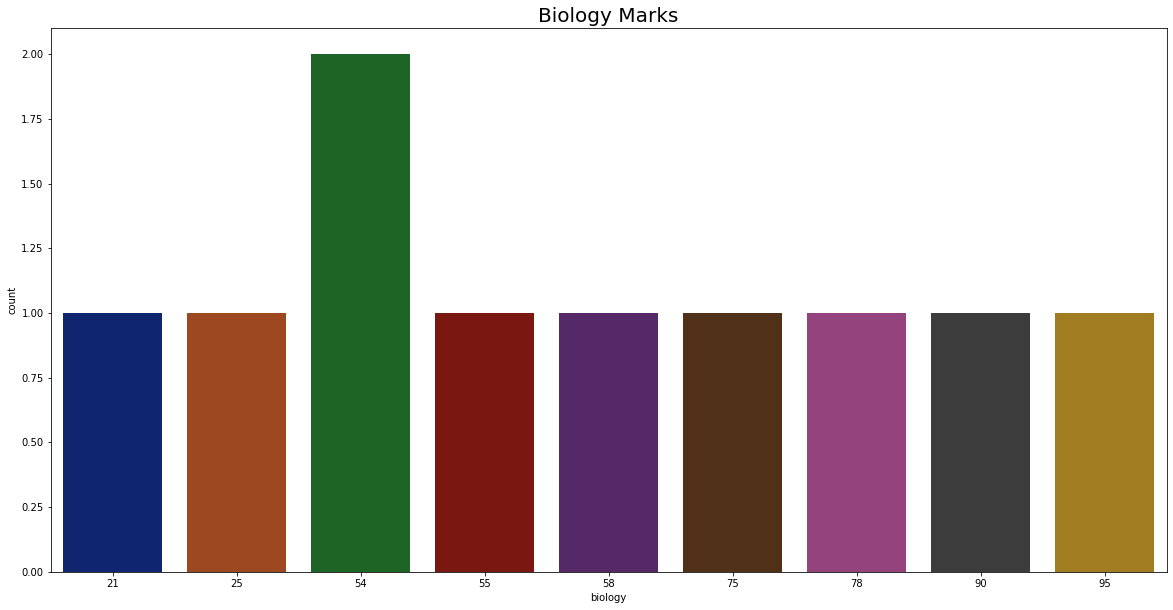

In [27]:
#We can see 54 marks is more scored
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['biology'], palette = 'dark')
plt.title('Biology Marks',fontsize = 20)
plt.show()

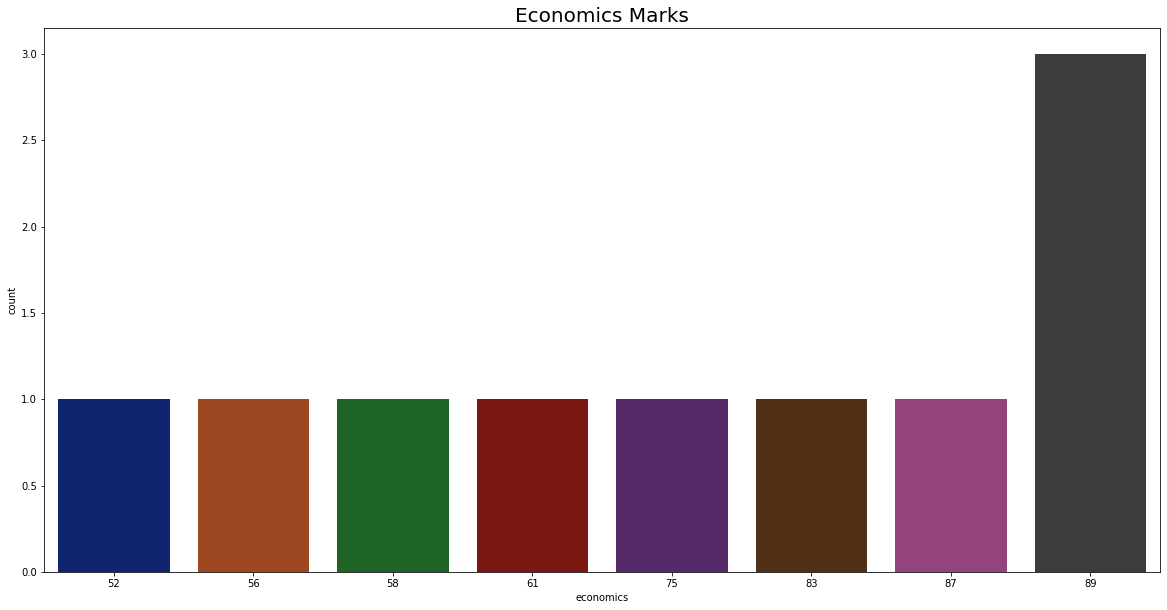

In [28]:
#We can see 89 marks is more scored
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['economics'], palette = 'dark')
plt.title('Economics Marks',fontsize = 20)
plt.show()

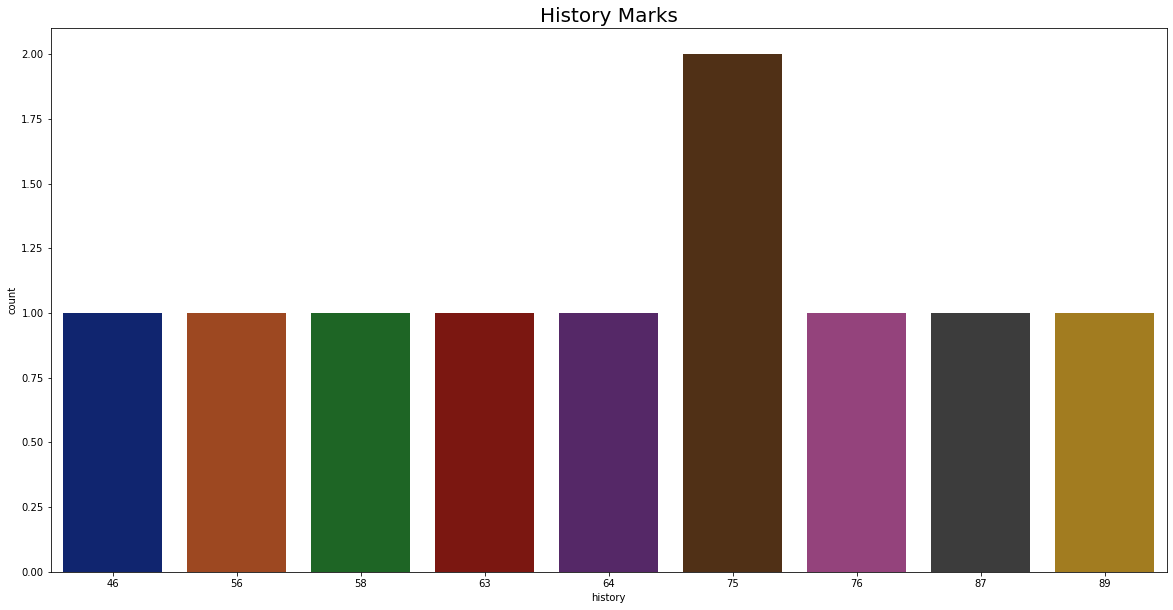

In [29]:
#We can see 75 marks is scored more
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['history'], palette = 'dark')
plt.title('History Marks',fontsize = 20)
plt.show()

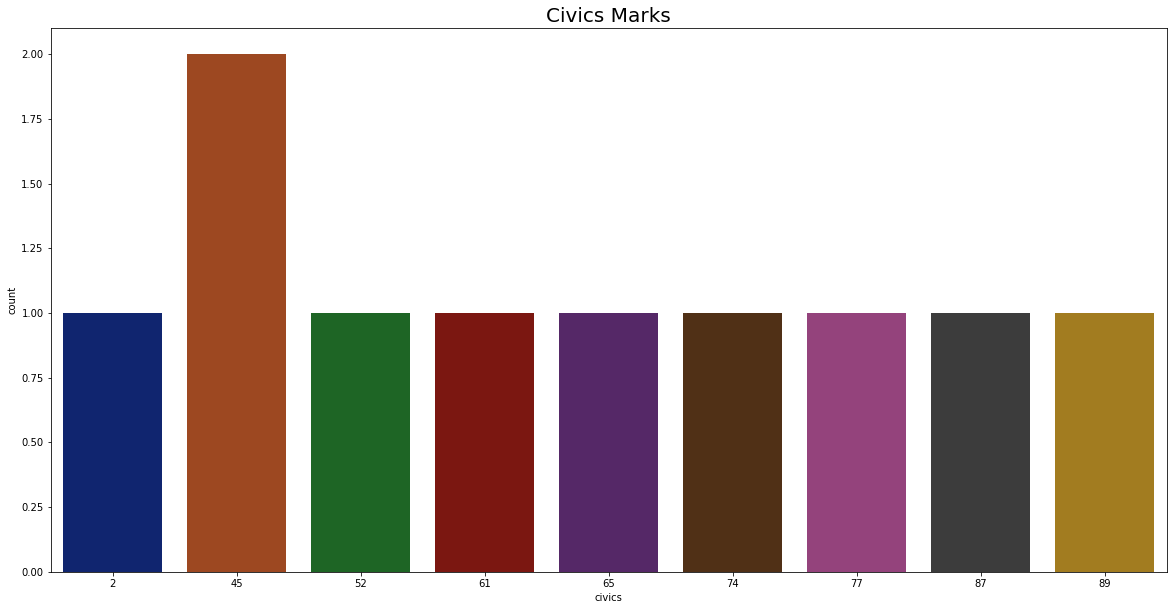

In [30]:
#45 marks is scored by 2 students
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['civics'], palette = 'dark')
plt.title('Civics Marks',fontsize = 20)
plt.show()

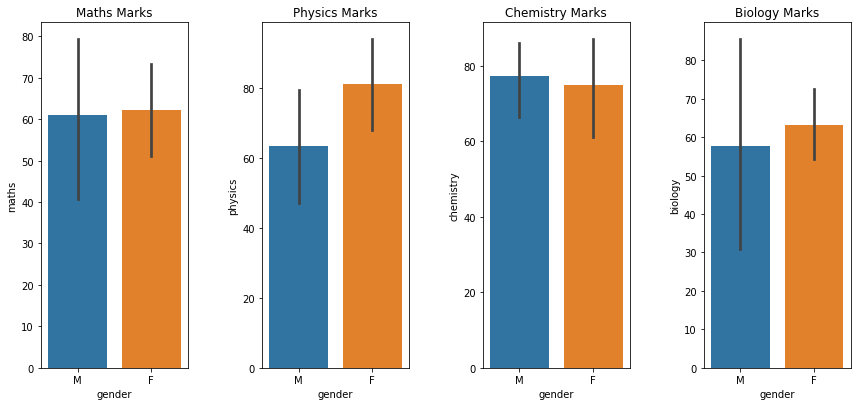

In [31]:
#Here we have done comparision according to Gender and different subjects
# Observations : Females have scored more in Maths , Physics and Biology .
#Observations : Males have scored more in chemistry 
plt.figure(figsize=(15,6))
plt.subplots_adjust(left=0.150, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Maths Marks')
sns.barplot(x="gender", y="maths", data=df)
plt.subplot(142)
plt.title('Physics Marks')
sns.barplot(x="gender", y="physics", data=df)
plt.subplot(143)
plt.title('Chemistry Marks')
sns.barplot(x="gender", y="chemistry", data=df)
plt.subplot(144)
plt.title('Biology Marks')
sns.barplot(x="gender", y="biology", data=df)
plt.show();

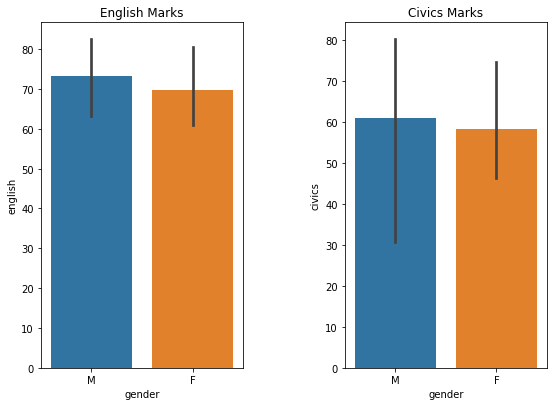

In [32]:
#Observations: Males have scrored more in English and Civics
plt.figure(figsize=(15,6))
plt.subplots_adjust(left=0.150, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('English Marks')
sns.barplot(x="gender", y="english", data=df)
plt.subplot(132)
plt.title('Civics Marks')
sns.barplot(x="gender", y="civics", data=df)
plt.show();

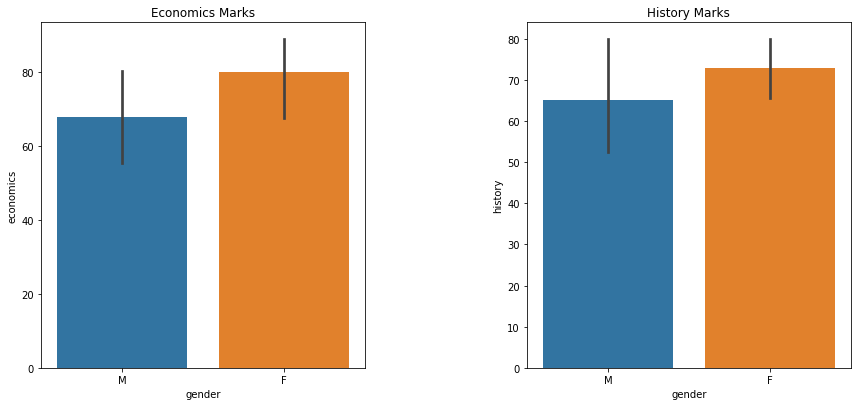

In [33]:
#Observations : Females have scored more in History and Economics
plt.figure(figsize=(15,6))
plt.subplots_adjust(left=0.150, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(121)
plt.title('Economics Marks')
sns.barplot(x="gender", y="economics", data=df)
plt.subplot(122)
plt.title('History Marks')
sns.barplot(x="gender", y="history", data=df)